<a href="https://colab.research.google.com/github/venkatesh1378/CNN/blob/main/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model=VGG16(weights="imagenet")

553467096/553467096 [==============================] - 5s 0us/step


In [ ]:
image_path='//content/goldfish.jpg'
img=image.load_img(image_path,target_size=(224,224))

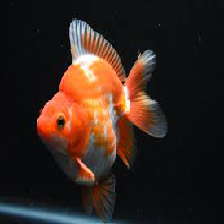

In [ ]:
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
x=preprocess_input(x)
x

array([[[[ -91.939, -106.779, -114.68 ],
         [ -91.939, -106.779, -114.68 ],
         [ -91.939, -106.779, -114.68 ],
         ...,
         [ -84.939,  -99.779, -107.68 ],
         [ -85.939, -100.779, -108.68 ],
         [ -85.939, -100.779, -108.68 ]],

        [[ -91.939, -106.779, -114.68 ],
         [ -91.939, -106.779, -114.68 ],
         [ -91.939, -106.779, -114.68 ],
         ...,
         [ -85.939, -100.779, -108.68 ],
         [ -85.939, -100.779, -108.68 ],
         [ -85.939, -100.779, -108.68 ]],

        [[ -91.939, -106.779, -114.68 ],
         [ -91.939, -106.779, -114.68 ],
         [ -91.939, -106.779, -114.68 ],
         ...,
         [ -85.939, -100.779, -108.68 ],
         [ -85.939, -100.779, -108.68 ],
         [ -85.939, -100.779, -108.68 ]],

        ...,

        [[ -85.939,  -97.779, -106.68 ],
         [ -85.939,  -97.779, -106.68 ],
         [ -85.939,  -97.779, -106.68 ],
         ...,
         [ -91.939, -106.779, -114.68 ],
         [ -91.939, -1

In [ ]:
data=model.predict(x)
class_names=[]
k=decode_predictions(data,top=5)
k

35363/35363 [==============================] - 0s 0us/step


[[('n01443537', 'goldfish', 0.9999974),
  ('n01950731', 'sea_slug', 2.124694e-06),
  ('n01632777', 'axolotl', 1.2168456e-07),
  ('n02607072', 'anemone_fish', 7.8484426e-08),
  ('n02655020', 'puffer', 5.2350348e-08)]]

In [ ]:
class_names=[]
cls=list(decode_predictions(data,top=1000))
for i in cls:
  for j in i:
    class_names.append(j[1])


In [ ]:
class_names[:5]

['goldfish', 'sea_slug', 'axolotl', 'anemone_fish', 'puffer']

In [ ]:
class_names[0]

'goldfish'